# Prediksi Harga Rumah
- menggunakan algoritma multiple linear regression
- data dan kode diperoleh dari https://github.com/adimasmudi/house_prediction
- Multiple linear regression memiliki beberapa variabel independen

Multiple linear regression memiliki rumus dan dan penjelasan sebagai berikut:

Y = b + e + m1*x1 + m2*x2 + ... + m(n)*x(n)
dimana:
Y : variabel dependen (terpengaruhi)
mn = 

## 1. Data Understanding

Memanggil library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS

membuka dataset

In [4]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Data diatas memuat banyak informasi, namun untuk melakukan prediksi harga rumah membutuhkan beberapa variabel yaitu:
- Variabel independen: 'bedroom', 'bathroom', 'sqft_living', 'grade', yr_built'
- Variabel dependen(yang dipengaruhi oleh variabel independen): 'price'

In [5]:
dataFrame = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built','price'])
dataFrame

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,8,2009
21609,400000.0,4,2.50,2310,8,2014
21610,402101.0,2,0.75,1020,7,2009
21611,400000.0,3,2.50,1600,8,2004


In [6]:
#menampilkan jumlah data grade urutkan dari yang terbesar
dataFrame['grade'].value_counts().sort_index(ascending=True)

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

Penjelasan dari kolom diatas:
- bedrooms : jumlah kamar tidur
- bathrooms : jumlah kamar mandi
- sqft_living : luas ruangan dalam satuan sqft (square feet)
- grade : klasifikasi dari kelas rumah
- yr_built : tahun bangunan
- price : harga rumah ($)

In [7]:
#melihat data teratas
#variabel independen(x) adalah 'bedroom', 'bathroom', 'sqft_living', 'grade', yr_built'.
#variabel dependen(y) adalah 'price'
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
5,1225000.0,4,4.50,5420,11,2001
6,257500.0,3,2.25,1715,7,1995
7,291850.0,3,1.50,1060,7,1963
8,229500.0,3,1.00,1780,7,1960
9,323000.0,3,2.50,1890,7,2003


In [8]:
#melihat data terbawah
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
21603,507250.0,3,2.50,2270,8,2003
21604,429000.0,3,2.00,1490,8,2014
21605,610685.0,4,2.50,2520,9,2014
21606,1007500.0,4,3.50,3510,9,2009
21607,475000.0,3,2.50,1310,8,2008
21608,360000.0,3,2.50,1530,8,2009
21609,400000.0,4,2.50,2310,8,2014
21610,402101.0,2,0.75,1020,7,2009
21611,400000.0,3,2.50,1600,8,2004
21612,325000.0,2,0.75,1020,7,2008


In [9]:
#melihat jumlah baris dan kolom
dataFrame.shape

(21613, 6)

In [10]:
#melihat nama kolom, jumlah data, dan tipe data
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


dari data diatas dapat dilihat bahwa kolom 'bathrooms' memiliki tipe data float, kita perlu ubah menjadi int karena nilai dari kolom 'bathrooms' harus bilangan bulat.

In [11]:
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [12]:
#melihat nilai dengan jumlah data terbanyak pada kolom 'bedrooms'
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

- mengubah tipe data kolom 'bathrooms' menjadi int karena data 'bathroom' tidak cocok dengan tipe data float
- mengganti nilai 33 menjadi 3(nilai terbanyak) pada kolom 'bedrooms'

In [13]:
#mengubah tipe data kolom 'bathrooms' menjadi integer(int)
dataFrame['bathrooms'] = dataFrame['bathrooms'].astype(int)
dataFrame.dtypes

price          float64
bedrooms         int64
bathrooms        int32
sqft_living      int64
grade            int64
yr_built         int64
dtype: object

In [14]:
#mengubah nilai 33 pada kolom 'bedroom' menjadi 3
dataFrame['bedrooms'] = dataFrame['bedrooms'].replace(33, 3)

In [15]:
#cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan
dataFrame[dataFrame['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,grade,yr_built


dari hasil diatas menunjukkan bahwa sudah tidak ada nilai 33 pada kolom 'bedrooms'

## 2. Data Preparation

In [16]:
#melihat data yang kosong
dataFrame.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

Dari hasil diatas tidak ada data yang kosong, sehingga tidak perlu melakukan penghapusan data

### EDA(Exploratory Data Analysis)
Proses dalam data untuk melihat pola-pola tertentu

In [17]:
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


Melakukan univariate analysis, berfungsi untuk menganalisa tiap variabel tanpa dihubungkan dengan variabel lain.

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Jumlah Data')

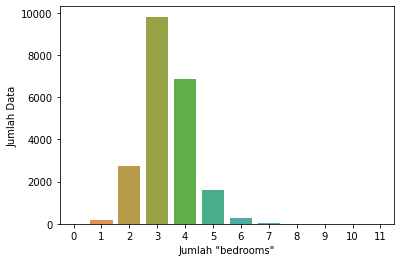

In [18]:
# univariate analysis variabel 'bedrooms'
# melihat persebaran data pada kolom 'bedrooms' dengan plot

sns.countplot(dataFrame['bedrooms'])
plt.xlabel('Jumlah "bedrooms"')
plt.ylabel('Jumlah Data')

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


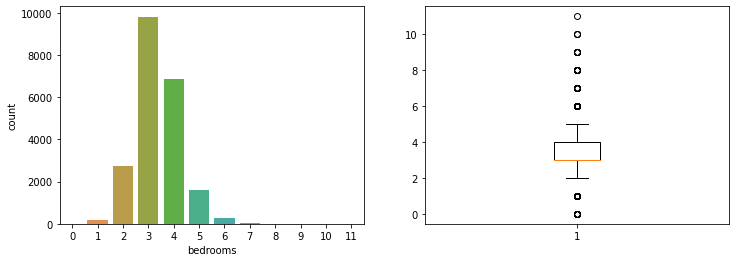

In [19]:
#menggunakan subplot untuk menampilkan
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)

#plot kiri
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bedrooms'])

#plot kanan
f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'bedrooms'
plt.boxplot(dataFrame['bedrooms'])
plt.show()


informasi:
- kebanyakan jumlah bedrooms dalam rumah adalah 3 dan 4
- banyak memiliki outliers dilihat dari data diluar garis minimum dan maksimum

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


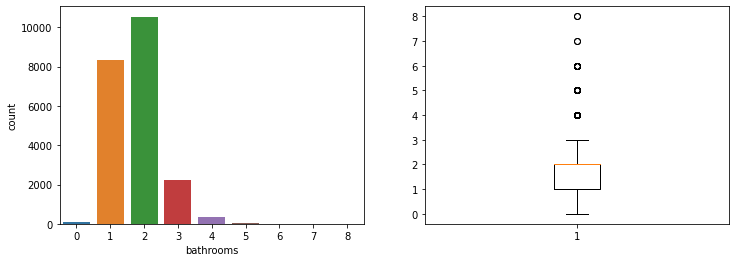

In [20]:
# univariate analysis variabel 'bathrooms'
# melihat persebaran data pada kolom 'bathrooms' dengan plot
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bathrooms'])

f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'bathrooms'
plt.boxplot(dataFrame['bathrooms'])
plt.show()

informasi:
- kebanyakan jumlah bathrooms dalam rumah adalah 1 dan 2
- ada beberapa outliers dilihat dari data diluar garis maksimum

In [21]:
#melihat nilai tertinggi pada kolom 'bathrooms'
dataFrame['bathrooms'].value_counts().sort_index(ascending=True)

0       86
1     8355
2    10542
3     2228
4      338
5       48
6       12
7        2
8        2
Name: bathrooms, dtype: int64

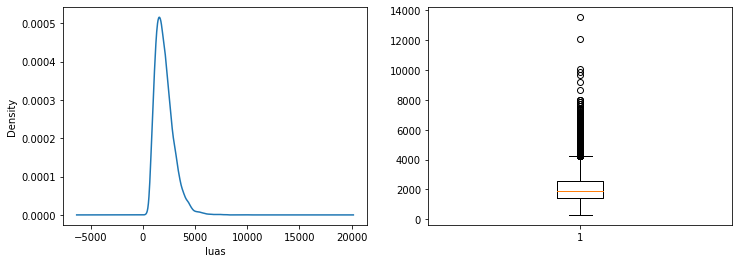

In [22]:
#univariate analysis variabel 'sqft_living'
# melihat persebaran data pada kolom 'sqft_living' dengan plot
from matplotlib.pyplot import xlabel


f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living'].plot(kind='kde')
plt.xlabel('luas')

f.add_subplot(1,2,2)
#membuat boxplot untuk kolom 'sqft_living'
plt.boxplot(dataFrame['sqft_living'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_living) ada di angka 2000an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


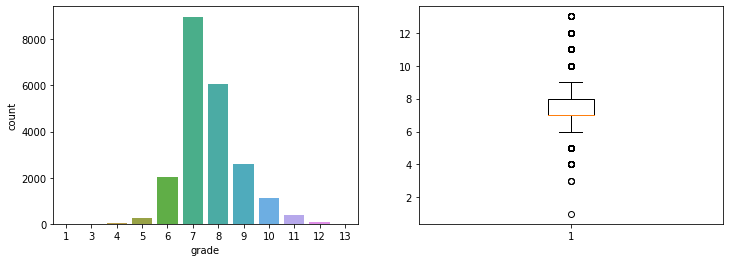

In [23]:
# univariate analysis grade
# melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

informasi:
- kebanyakan rumah memiliki grade 7 dan 8
- boxplot menunjukkan ada outlier di bawah garis minimum dan diatas garis maksimum

In [24]:
dataFrame['grade'].value_counts().sort_index(ascending = True)

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


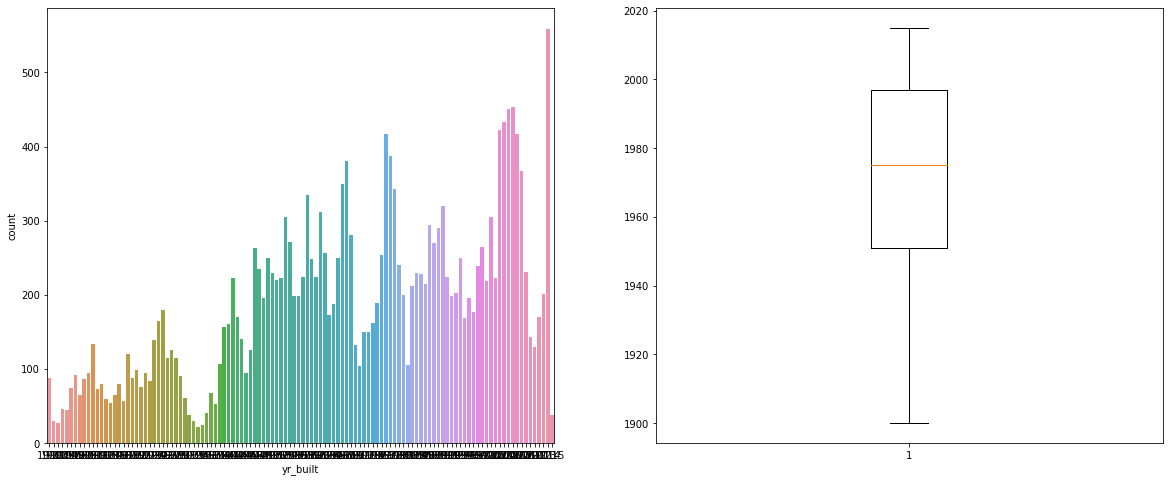

In [25]:
# univariate analysis kolom 'yr_built'
# melihat distribusi dari kolom 'yr_built'

f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(dataFrame['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['yr_built'])
plt.show()

informasi:
- rumah dengan 'yr_built' tua cukup sedikit yang dijual
- rumah dengan 'yr_built' paling muda juga cukup sedikit yang dijual
- dari boxplot yang dihasilkan, tidak ada outliers dari kolom tersebut

In [26]:
dataFrame['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

dari informasi diatas menunjukkan bahwa rumah yang paling banyak dijual adalah rumah dengan 'yr_built' 2014'

In [27]:
dataFrame['yr_built'].max()


2015

In [28]:
dataFrame['yr_built'].min()

1900

In [29]:
dataFrame['yr_built'].value_counts().sort_index(ascending = True)

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

Bivariate analysis untuk melihat hubungan masing-masing variabel independen dan variabel dependen


c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


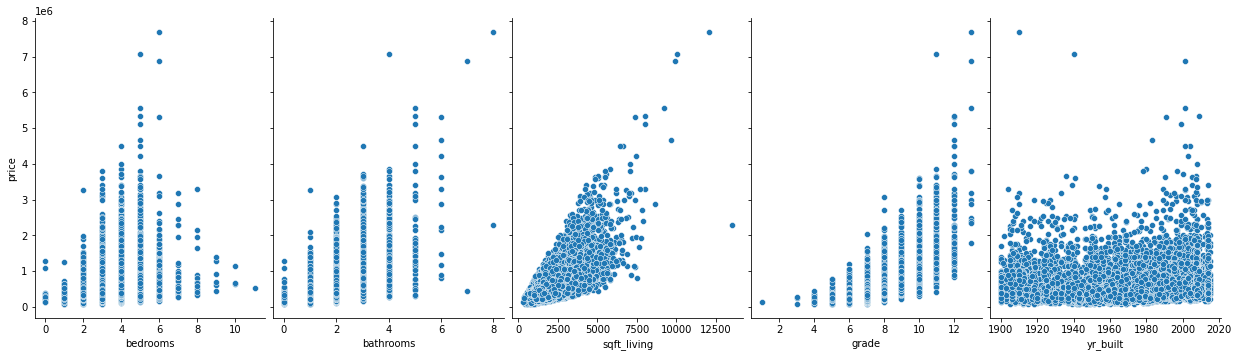

In [30]:
plt.Figure(figsize=(10, 8))
sns.pairplot(data=dataFrame,
             x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], 
             y_vars=['price'],
             size=5,
             aspect=0.7)

<AxesSubplot:>

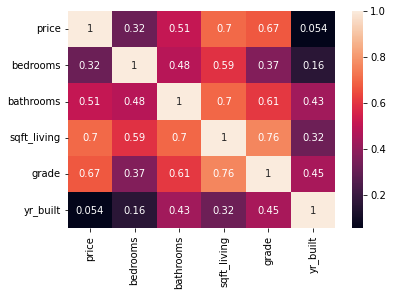

In [42]:
#heatmap untuk dataFrame, melihat korelasi dari variabel independen dan dependen
plt.Figure(figsize=(10, 8))
sns.heatmap(dataFrame.corr(), annot=True)

In [43]:
#melihat nilai korelasi dari variabel independen dan dependen
dataFrame.corr().style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.000000,0.315438,0.510072,0.702035,0.667434,0.054012
bedrooms,0.315438,1.000000,0.480389,0.591471,0.366509,0.159180
bathrooms,0.510072,0.480389,1.000000,0.697875,0.606631,0.433647
sqft_living,0.702035,0.591471,0.697875,1.000000,0.762704,0.318049
grade,0.667434,0.366509,0.606631,0.762704,1.000000,0.446963
yr_built,0.054012,0.159180,0.433647,0.318049,0.446963,1.000000


## 3. Modelling

In [44]:
#melihat 5 data pertama
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


membuat variabel x sebagai variabel independen, variabel diambil dari data yang sudah ada, variabel 'price' dihilangkan karena merupakan variabel dependen

variabel y berisi variabel 'price' sebagai variabel dependen

In [46]:
x = dataFrame.drop(['price'], axis=1)
y = dataFrame['price']

In [49]:
from sklearn.model_selection import train_test_split

split data training dan data testing dengan pembagian 80%(training) dan 20%(testing)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
#cek shape data train dan test
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (17290, 5)
x_test:  (4323, 5)
y_train:  (17290,)
y_test:  (4323,)


In [57]:
x_train

,bedrooms,bathrooms,sqft_living,grade,yr_built
6325,3,1,1780,9,1983
13473,2,1,1000,6,1929
17614,3,1,1080,6,1942
16970,3,2,2090,7,1977
20868,2,2,1741,8,2007
...,...,...,...,...,...
11964,3,1,1000,7,1947
21575,3,2,3087,8,2014
5390,3,2,2120,7,2004
860,1,0,380,5,1963


In [58]:
x_test

,bedrooms,bathrooms,sqft_living,grade,yr_built
735,4,2,2070,8,1986
2830,5,3,2900,8,1977
4106,4,2,3770,11,1997
16218,3,3,4560,12,1990
19964,3,2,2550,9,2004
...,...,...,...,...,...
13674,3,1,1250,7,1947
20377,3,2,2830,8,2012
8805,4,2,2434,8,2007
10168,4,1,2250,8,1967


In [56]:
y_train

6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64

In [53]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
13674     338000.0
20377     673000.0
8805      285000.0
10168     605000.0
2522      356500.0
Name: price, Length: 4323, dtype: float64

In [59]:
#menggunakan algoritma linear regression untuk menentukan model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [60]:
#cari nilai koeffisien dan intercept
print("coefficient: ", model.coef_)
print("intercept: ", model.intercept_)

coefficient:  [-51516.1497454   67633.49288667    185.76376576 129843.75765425
  -3998.13102714]
intercept:  7094651.058305041


In [61]:
#input hasil koeffisien ke dalam tabel dengan kolom "features" dan "coef_value"
coef_table = pd.DataFrame({"features": x_train.columns, "coef_value": model.coef_})
coef_table

,features,coef_value
0,bedrooms,-51516.149745
1,bathrooms,67633.492887
2,sqft_living,185.763766
3,grade,129843.757654
4,yr_built,-3998.131027


In [64]:
#melihat akuratnya model
model.score(x_test, y_test)

0.6094826631691829

In [90]:
model.predict([[3, 2, 2570, 7, 1951]])

c:\Users\INC\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([661335.14246282])

In [ ]:
#membuat pair